In [165]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.optimize import fixed_point
from scipy.misc import derivative
from scipy.interpolate import interp1d
from scipy.optimize import fminbound
from numba import jit

In [166]:
# Define Maximize funcion V on interval [a,b]
def maximum(V,a,b):
    return float(V(fminbound(lambda x: -V(x),a,b)))

# Define Maximizer of function V on interval [a,b]
def maximizer(V,a,b):
    return float(fminbound(lambda x: -V(x),a,b))

In [167]:
# Define Functions for Basic Settings

def u(c,σ = 3):
    return (c**(1-σ))/(1-σ)

def f(k,l,α=0.36):
    return (k**(α)) * (l**(1-α))

# Assign Parameters

β = 0.96 ; r = 0.04 ; δ = 0.08 ; α = 0.36

In [168]:
## Using Tauchen Method to Discritize the Labor Endowlent

"""
Filename: tauchen.py

Authoars: Thomas Sargent, John Stachurski

Discretizes Gaussian linear AR(1) processes via Tauchen's method

"""

import numpy as np
from scipy.stats import norm


# [docs]
def approx_markov(rho, sigma_u, m=3, n=7):
    """
    Computes the Markov matrix associated with a discretized version of
    the linear Gaussian AR(1) process

        y_{t+1} = rho * y_t + u_{t+1}

    according to Tauchen's method.  Here {u_t} is an iid Gaussian
    process with zero mean.

    Parameters
    ----------
    rho : scalar(float)
        The autocorrelation coefficient
    sigma_u : scalar(float)
        The standard deviation of the random process
    m : scalar(int), optional(default=3)
        The number of standard deviations to approximate out to
    n : scalar(int), optional(default=7)
        The number of states to use in the approximation

    Returns
    -------

    x : array_like(float, ndim=1)
        The state space of the discretized process
    P : array_like(float, ndim=2)
        The Markov transition matrix where P[i, j] is the probability
        of transitioning from x[i] to x[j]

    """
    F = norm(loc=0, scale=sigma_u).cdf

    # standard deviation of y_t
    std_y = np.sqrt(sigma_u**2 / (1-rho**2))

    # top of discrete state space
    x_max = m * std_y

    # bottom of discrete state space
    x_min = - x_max

    # discretized state space
    x = np.linspace(x_min, x_max, n)

    step = (x_max - x_min) / (n - 1)
    half_step = 0.5 * step
    P = np.empty((n, n))

    for i in range(n):
        P[i, 0] = F(x[0]-rho * x[i] + half_step)
        P[i, n-1] = 1 - F(x[n-1] - rho * x[i] - half_step)
        for j in range(1, n-1):
            z = x[j] - rho * x[i]
            P[i, j] = F(z + half_step) - F(z - half_step)

    return x, P

In [169]:
# Tauchen Method
ρ = 0.9 ; σ_l = 0.2 ; l_size = 7

l_s = np.exp(approx_markov(ρ,σ_l*((1-ρ**2)**(1/2)), m=3, n = l_size)[0])
Π = np.round(approx_markov(ρ,σ_l*((1-ρ**2)**(1/2)), m=3, n = l_size)[1],decimals=3)

In [170]:
l_s, Π

(array([0.54881164, 0.67032005, 0.81873075, 1.        , 1.22140276,
        1.4918247 , 1.8221188 ]),
 array([[0.677, 0.32 , 0.003, 0.   , 0.   , 0.   , 0.   ],
        [0.054, 0.7  , 0.244, 0.001, 0.   , 0.   , 0.   ],
        [0.   , 0.084, 0.736, 0.179, 0.001, 0.   , 0.   ],
        [0.   , 0.   , 0.125, 0.749, 0.125, 0.   , 0.   ],
        [0.   , 0.   , 0.001, 0.179, 0.736, 0.084, 0.   ],
        [0.   , 0.   , 0.   , 0.001, 0.244, 0.7  , 0.054],
        [0.   , 0.   , 0.   , 0.   , 0.003, 0.32 , 0.677]]))

In [171]:
# Define a grid for interest rate r
r_min = - δ
r_max = (1 - β) / β
r_size = 10
r_grid = np.linspace(r_min*0.9, r_max*0.9, r_size)
r_grid

array([-0.072     , -0.05983333, -0.04766667, -0.0355    , -0.02333333,
       -0.01116667,  0.001     ,  0.01316667,  0.02533333,  0.0375    ])

In [172]:
# Auto Process for finding Value Functions and Policy Functions

# Set a Grid for Asset

A_l = 0
A_h = 20
a_grid_min = A_l ; a_grid_max = A_h ; a_size = 100
a_grid = np.linspace(a_grid_min, a_grid_max, a_size)

V = []
P = []

for j in range(r_size):
        column1 = []
        for i in range(l_size):
                column1.append(0)
        V.append(column1)
        
for j in range(r_size):
    for i in range(l_size):
        V[j][i] = interp1d(a_grid, a_grid)
        
for j in range(r_size):
        column2 = []
        for i in range(l_size):
                column2.append(0)
        P.append(column2)

for j in range(r_size):
    for i in range(l_size):
        P[j][i] = 0

count 0
err 627.9830512953655
count 50
err 7.849868056289127
count 100
err 0.7240813829346353
count 150
err 0.06696753663903937
count 200
err 0.006193627822292935
count 250
err 0.0005728301884641573
count 287
err 9.838427487834922e-05


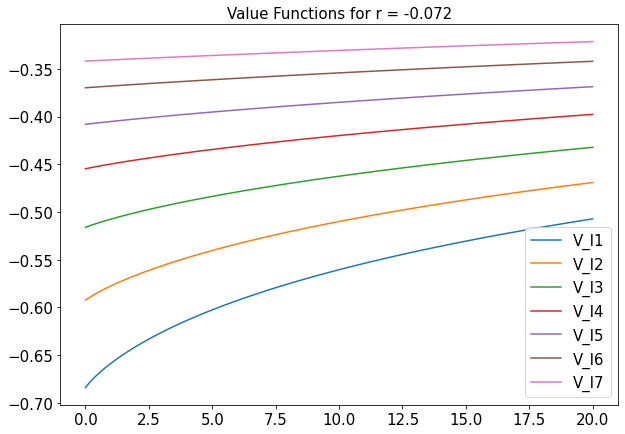

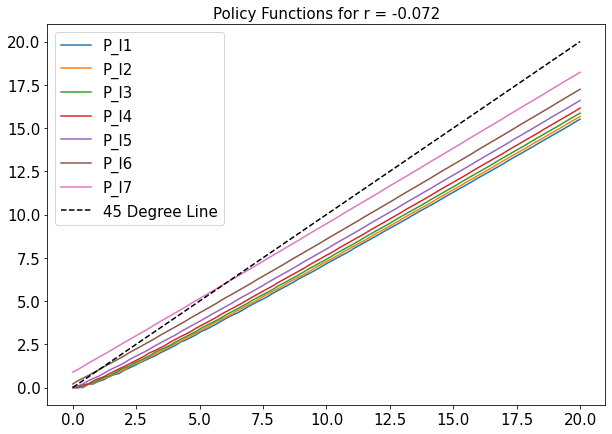

count 0
err 342.9594185691431
count 50
err 6.53846787965063
count 100
err 0.5930968639678778
count 150
err 0.05485035300680452
count 200
err 0.005072944750560082
count 250
err 0.00046918155966801933
count 283
err 9.74886927458396e-05


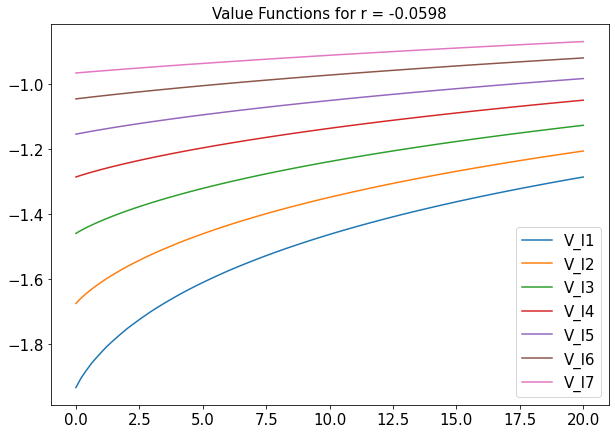

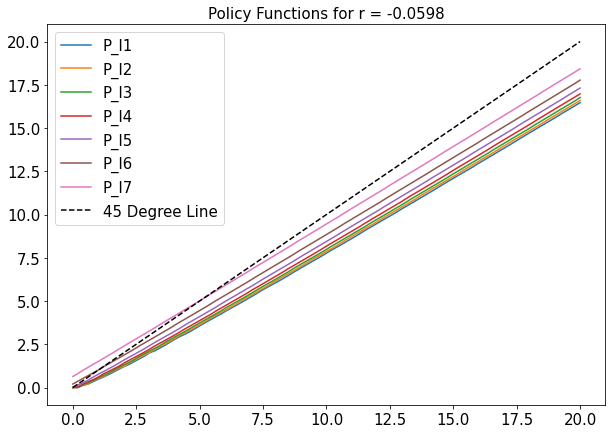

count 0
err 221.28330414040792
count 50
err 5.242164263758473
count 100
err 0.4653853760714024
count 150
err 0.04303703216014165
count 200
err 0.0039803653649033155
count 250
err 0.0003681321370505586
count 278
err 9.705300272511153e-05


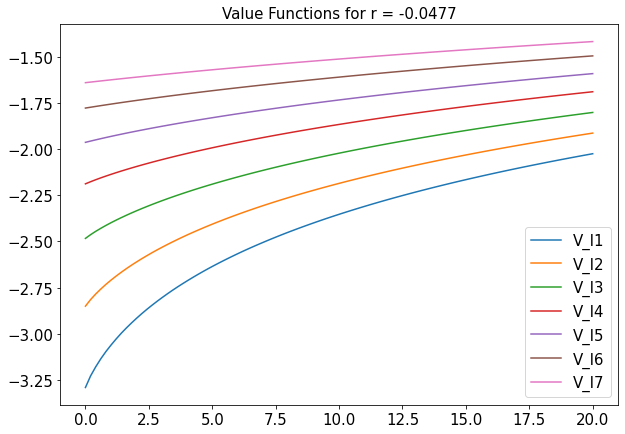

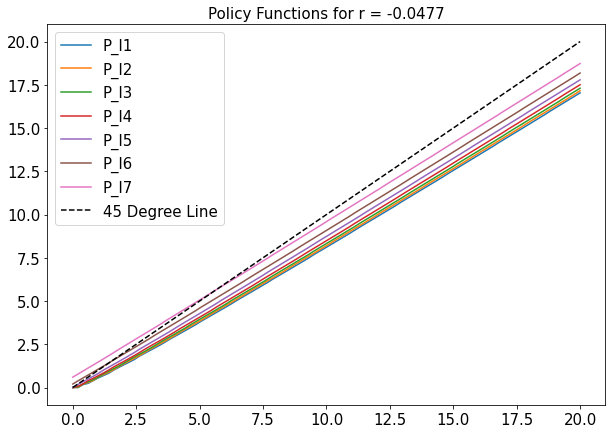

count 0
err 156.39416410036003
count 50
err 4.582557216324971
count 100
err 0.39607042207363174
count 150
err 0.036625573793685806
count 200
err 0.003387388458867102
count 250
err 0.00031328946953257386
count 274
err 9.992279656056979e-05


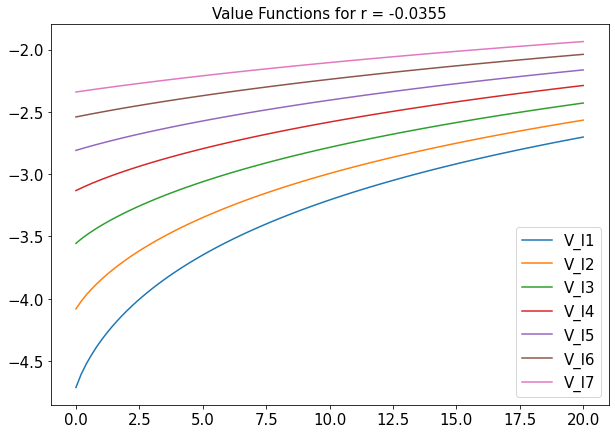

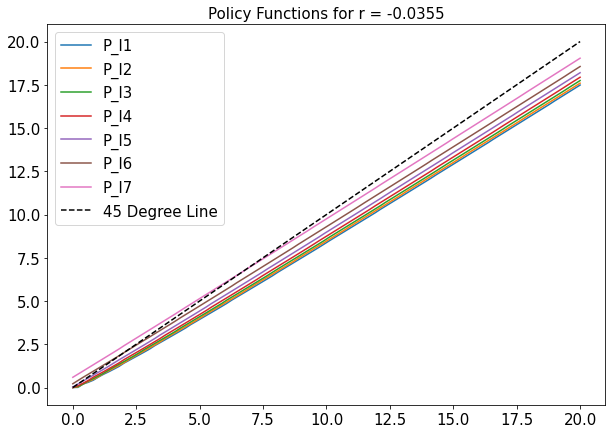

count 0
err 117.9199784179851
count 50
err 4.5207176138802865
count 100
err 0.3701062176281611
count 150
err 0.03422254103860434
count 200
err 0.0031651386971152107
count 250
err 0.00029273424022591144
count 273
err 9.79198163202355e-05


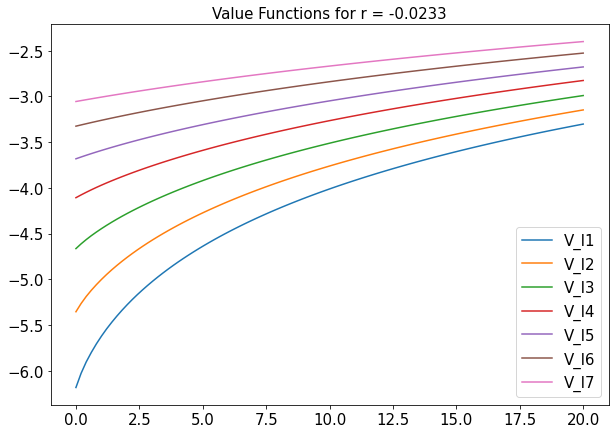

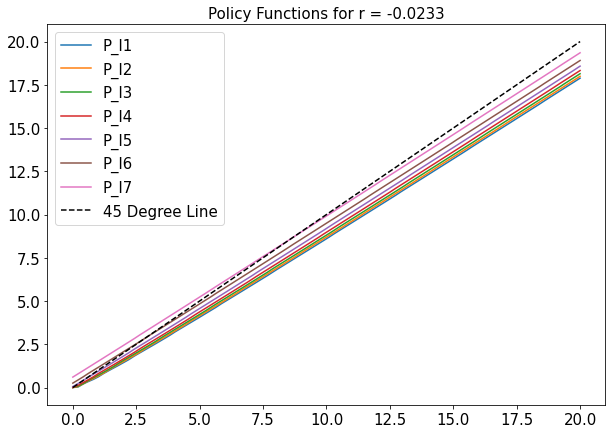

count 0
err 94.07413417559175
count 50
err 5.109875127885475
count 100
err 0.372728910263747
count 150
err 0.03445451388478382
count 200
err 0.0031865908292059153
count 250
err 0.00029471829356308987
count 273
err 9.858350599545318e-05


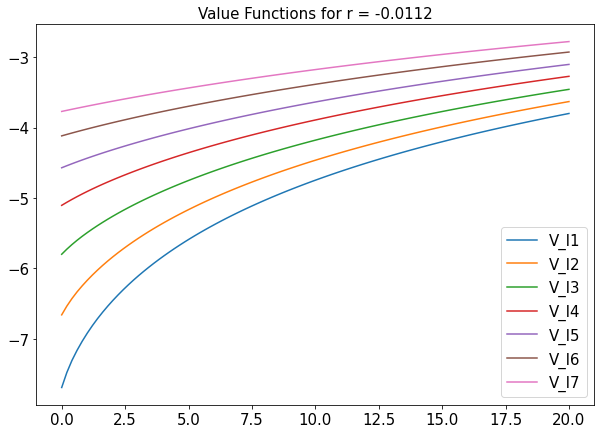

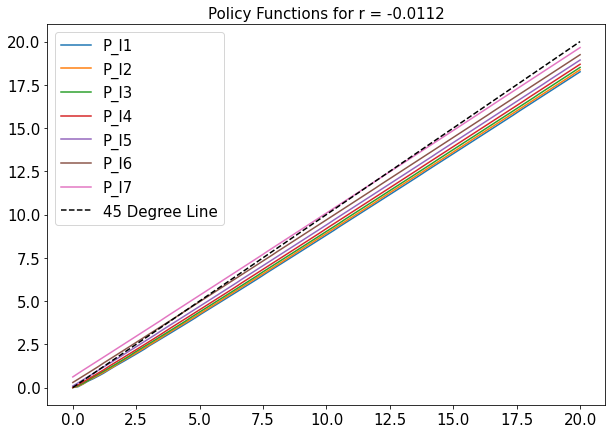

count 0
err 79.09048445701642
count 50
err 6.4020763532028795
count 100
err 0.39868224256909235
count 150
err 0.036732732369466614
count 200
err 0.003397229003568647
count 250
err 0.000314199556690653
count 275
err 9.555336036282114e-05


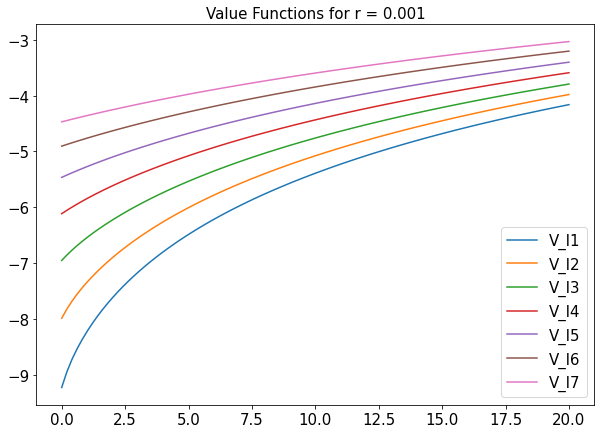

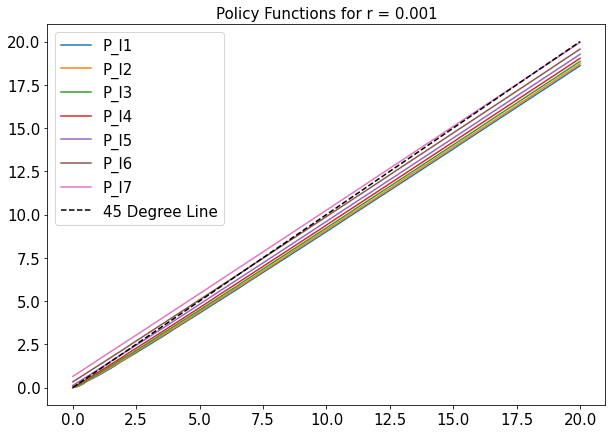

count 0
err 69.92797799824208
count 50
err 7.7757604770342255
count 100
err 0.4636572125719125
count 150
err 0.04132966979641184
count 200
err 0.0038179797406683313
count 250
err 0.0003531007493209337
count 277
err 9.762967166748737e-05


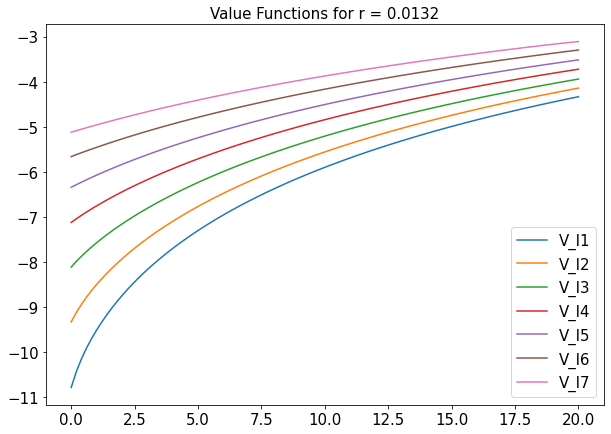

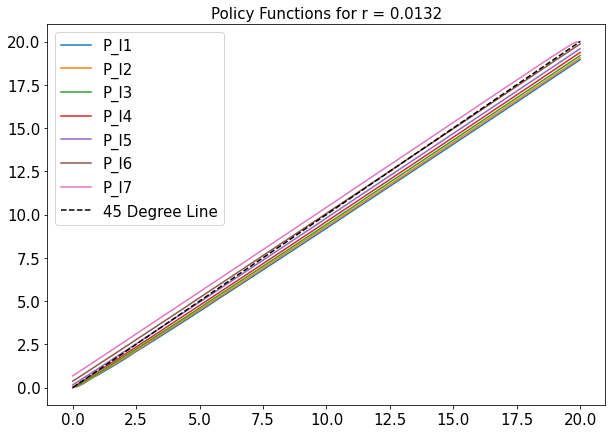

count 0
err 64.81340565951731
count 50
err 8.557209245336143
count 100
err 0.6318625684663597
count 150
err 0.05145143846185318
count 200
err 0.0046299160407867745
count 250
err 0.0004261048455309613
count 281
err 9.731664895706871e-05


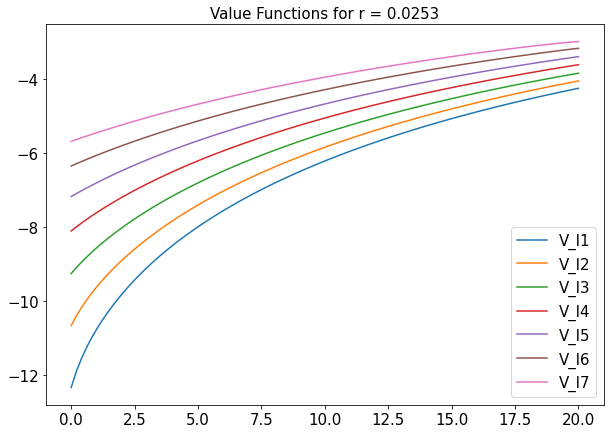

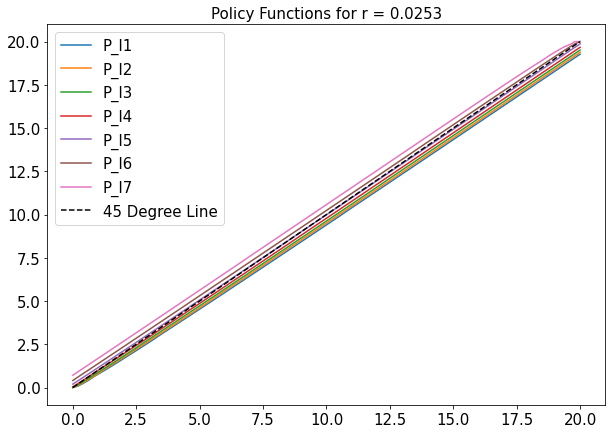

count 0
err 62.68647366914273
count 50
err 8.839392251607329
count 100
err 0.7933529438975477
count 150
err 0.07111672101838762
count 200
err 0.006433010774775649
count 250
err 0.0005869076103386384
count 288
err 9.549786205509392e-05


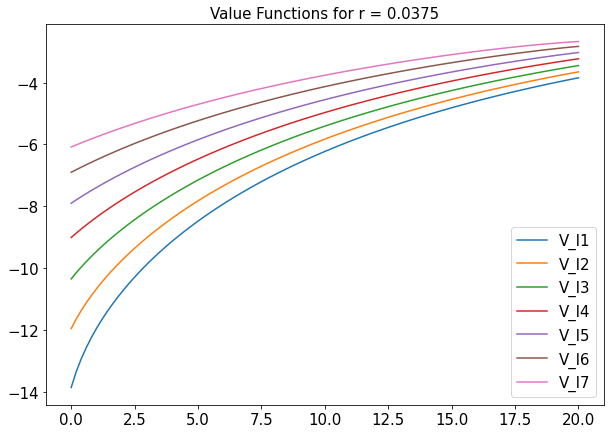

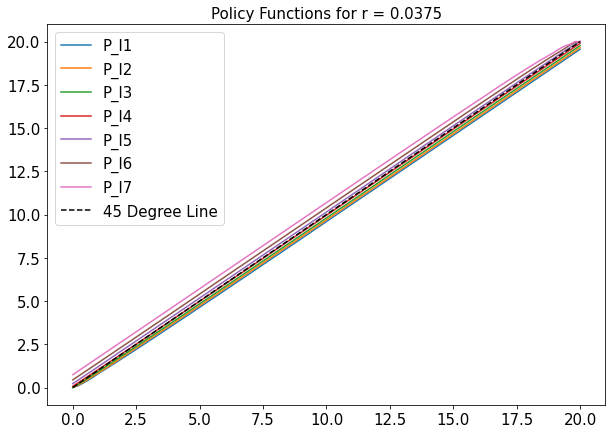

In [173]:
for j in range(r_size):
    
    r = r_grid[j]
    w = (1 - α) * ((α / (r + δ))**(α / (1 - α)))

    max_iter = 1000
    count = 0
    tol = 1e-4

    while count < max_iter:

        for i in range(l_size):

            vals = []
            for a in a_grid:
                l = l_s[i]
                a_max = min( A_h , w*l + (1+r)*a )
                h = lambda a_prime: u(max( w*l + (1+r)*a - a_prime, 0)) + β * (Π[i,0]*V[j][0](a_prime) + Π[i,1]*V[j][1](a_prime) + Π[i,2]*V[j][2](a_prime) + Π[i,3]*V[j][3](a_prime) + Π[i,4]*V[j][4](a_prime) + Π[i,5]*V[j][5](a_prime) + Π[i,6]*V[j][6](a_prime)) 
                vals.append(float(maximum(h, A_l, a_max)))
            V0 = interp1d(a_grid, vals)
            err = np.sum(np.abs(V[j][i](a_grid) - V0(a_grid)))
            V[j][i] = V0

        if err < tol:
            print('count',count)
            print("err", err)
            break

        if int(count)%50 == 0 :
            print("count", count)
            print("err", err)

        count += 1

    plt.figure(figsize=(10, 7))
    plt.title("Value Functions for r = "+str(np.round(r, decimals=4)), fontsize = 15)
    plt.plot(a_grid,V[j][0](a_grid),label = 'V_l1')
    plt.plot(a_grid,V[j][1](a_grid),label = 'V_l2')
    plt.plot(a_grid,V[j][2](a_grid),label = 'V_l3')
    plt.plot(a_grid,V[j][3](a_grid),label = 'V_l4')
    plt.plot(a_grid,V[j][4](a_grid),label = 'V_l5')
    plt.plot(a_grid,V[j][5](a_grid),label = 'V_l6')
    plt.plot(a_grid,V[j][6](a_grid),label = 'V_l7')
    plt.legend(fontsize = 15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.show()

    for i in range(l_size):
        vals = []
        for a in a_grid:
            l = l_s[i]
            a_max = min( A_h , w*l + (1+r)*a )
            h = lambda a_prime: u(max( w*l + (1+r)*a - a_prime, 0)) + β * (Π[i,0]*V[j][0](a_prime) + Π[i,1]*V[j][1](a_prime) + Π[i,2]*V[j][2](a_prime) + Π[i,3]*V[j][3](a_prime) + Π[i,4]*V[j][4](a_prime) + Π[i,5]*V[j][5](a_prime) + Π[i,6]*V[j][6](a_prime)) 
            vals.append(float(maximizer(h, A_l, a_max)))
        P[j][i] = interp1d(a_grid, vals)

    plt.figure(figsize=(10, 7))
    plt.title("Policy Functions for r = "+str(np.round(r, decimals=4)), fontsize = 15)
    plt.plot(a_grid,P[j][0](a_grid),label = 'P_l1')
    plt.plot(a_grid,P[j][1](a_grid),label = 'P_l2')
    plt.plot(a_grid,P[j][2](a_grid),label = 'P_l3')
    plt.plot(a_grid,P[j][3](a_grid),label = 'P_l4')
    plt.plot(a_grid,P[j][4](a_grid),label = 'P_l5')
    plt.plot(a_grid,P[j][5](a_grid),label = 'P_l6')
    plt.plot(a_grid,P[j][6](a_grid),label = 'P_l7')
    plt.plot(a_grid,a_grid,label = '45 Degree Line',color = 'black',ls='dashed')
    plt.legend(fontsize = 15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.show()

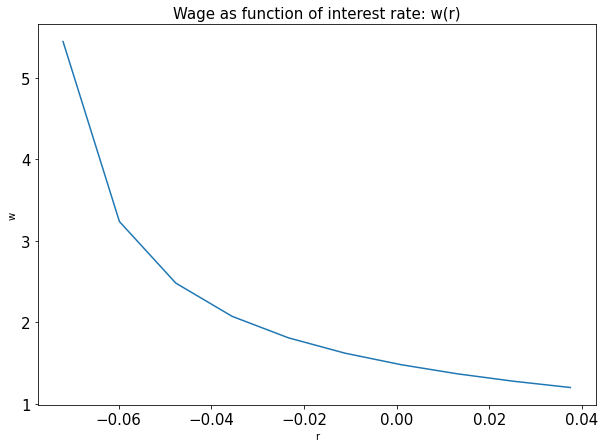

In [175]:
w = lambda r: (1-α) * ((α/(r+δ))**(α/(1-α)))
plt.figure(figsize=(10, 7))
plt.plot(r_grid,w(r_grid))
plt.xlabel('r')
plt.ylabel('w')
plt.title("Wage as function of interest rate: w(r)", fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

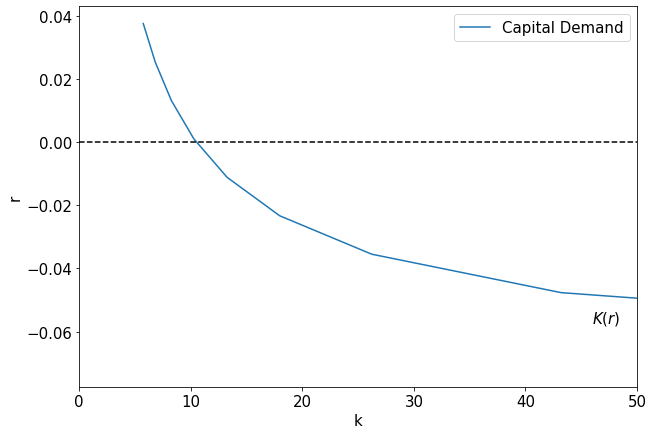

In [186]:
## K demand

k = lambda r : ((r+δ)/α)**(1/(α-1))
k_seq = k(r_grid)
k_demand = interp1d(k(r_grid),r_grid)

plt.figure(figsize=(10, 7))
plt.plot(k_seq,k_demand(k_seq),label = 'Capital Demand')
plt.ylabel('r', fontsize = 15)
plt.xlabel('k', fontsize = 15)
plt.xlim([0,50])
plt.hlines(y=0,xmin = 0, xmax = 50,colors='black',linestyles='dashed')
plt.text(x=46,y=-0.057,s=r'$K(r)$', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize = 15)
plt.show()

In [177]:
## K supply

sample_size = 100000
matrix0 = np.zeros([sample_size,2])

for i in range(sample_size):
    y = np.random.uniform()
    if y < 1/7 : 
        matrix0[i,1] = 1
    if 1/7 <= y < 2/7 : 
        matrix0[i,1] = 2
    if 2/7 <= y < 3/7 : 
        matrix0[i,1] = 3
    if 3/7 <= y < 4/7 : 
        matrix0[i,1] = 4
    if 4/7 <= y < 5/7 : 
        matrix0[i,1] = 5
    if 5/7 <= y < 6/7 : 
        matrix0[i,1] = 6
    if 6/7 <= y :
        matrix0[i,1] = 7

In [178]:
# Used Simulation Method to calculate distribution

Ks = np.zeros(r_size)
Ksum = np.zeros(r_size)




for j in 0,1,2,3,4,5,6:
    
    sample_size = 10000
    matrix0 = np.zeros([sample_size,2])*5
    for i in range(sample_size):
        y = np.random.uniform()
        if y < 1/7 : 
            matrix0[i,1] = 1
        if 1/7 <= y < 2/7 : 
            matrix0[i,1] = 2
        if 2/7 <= y < 3/7 : 
            matrix0[i,1] = 3
        if 3/7 <= y < 4/7 : 
            matrix0[i,1] = 4
        if 4/7 <= y < 5/7 : 
            matrix0[i,1] = 5
        if 5/7 <= y < 6/7 : 
            matrix0[i,1] = 6
        if 6/7 <= y :
            matrix0[i,1] = 7
    
    count = 0
    max_iter = 1000
    tol = 1e-5
    
    while count < max_iter : 
    
        matrix1 = np.empty([sample_size,2])

        for i in range(sample_size):
            if matrix0[i,1] == 1 :
                matrix1[i,0] = np.round(P[j][0](matrix0[i,0]),decimals=3)
                y = np.random.uniform()
                if y < Π[0,0] :
                    matrix1[i,1] = 1
                if Π[0,0] <= y < Π[0,0] + Π[0,1] :
                    matrix1[i,1] = 2
                if Π[0,0] + Π[0,1] <= y :
                    matrix1[i,1] = 3

            if matrix0[i,1] == 2 :
                matrix1[i,0] = np.round(P[j][1](matrix0[i,0]),decimals=3)
                y = np.random.uniform()
                if y < Π[1,0] :
                    matrix1[i,1] = 1
                if Π[1,0] <= y < Π[1,0] + Π[1,1] :
                    matrix1[i,1] = 2
                if Π[1,0] + Π[1,1] <= y < Π[1,0] + Π[1,1] + Π[1,2]:
                    matrix1[i,1] = 3
                if Π[1,0] + Π[1,1] + Π[1,2] <= y :
                    matrix1[i,1] = 4

            if matrix0[i,1] == 3 :
                matrix1[i,0] = np.round(P[j][2](matrix0[i,0]),decimals=3)
                y = np.random.uniform()
                if y < Π[2,1] :
                    matrix1[i,1] = 2
                if Π[2,1] <= y < Π[2,1] + Π[2,2] :
                    matrix1[i,1] = 3
                if Π[2,1] + Π[2,2] <= y < Π[2,1] + Π[2,2] + Π[2,3]:
                    matrix1[i,1] = 4
                if Π[2,1] + Π[2,2] + Π[2,3] <= y :
                    matrix1[i,1] = 5

            if matrix0[i,1] == 4 :
                matrix1[i,0] = np.round(P[j][3](matrix0[i,0]),decimals=3)
                y = np.random.uniform()
                if y < Π[3,2] :
                    matrix1[i,1] = 3
                if Π[3,2] <= y < Π[3,2] + Π[3,3] :
                    matrix1[i,1] = 4
                if Π[3,2] + Π[3,3] <= y < Π[3,2] + Π[3,3] + Π[3,4]:
                    matrix1[i,1] = 5

            if matrix0[i,1] == 5 :
                matrix1[i,0] = np.round(P[j][4](matrix0[i,0]),decimals=3)
                y = np.random.uniform()
                if y < Π[4,2] :
                    matrix1[i,1] = 3
                if Π[4,2] <= y < Π[4,2] + Π[4,3] :
                    matrix1[i,1] = 4
                if Π[4,2] + Π[4,3] <= y < Π[4,2] + Π[4,3] + Π[4,4]:
                    matrix1[i,1] = 5
                if Π[4,2] + Π[4,3] + Π[4,4] <= y :
                    matrix1[i,1] = 6

            if matrix0[i,1] == 6 :
                matrix1[i,0] = np.round(P[j][5](matrix0[i,0]),decimals=3)
                y = np.random.uniform()
                if y < Π[5,3] :
                    matrix1[i,1] = 4
                if Π[5,3] <= y < Π[5,3] + Π[5,4] :
                    matrix1[i,1] = 5
                if Π[5,3] + Π[5,4] <= y < Π[5,3] + Π[5,4] + Π[5,5]:
                    matrix1[i,1] = 6
                if Π[5,3] + Π[5,4] + Π[5,5] <= y :
                    matrix1[i,1] = 7

            if matrix0[i,1] == 7 :
                matrix1[i,0] = np.round(P[j][6](matrix0[i,0]),decimals=3)
                y = np.random.uniform()
                if y < Π[6,4] :
                    matrix1[i,1] = 5
                if Π[6,4] <= y < Π[6,4] + Π[6,5] :
                    matrix1[i,1] = 6
                if Π[6,4] + Π[6,5] <= y :
                    matrix1[i,1] = 7

        err = np.abs(np.mean(matrix1[:,0]) - np.mean(matrix0[:,0]))

        if  err < tol:
            print('count',count)
            print('err',err)
            break

        if count % 50 == 0:
            print('count',count)
            print('err',err)

        count += 1
        matrix0 = matrix1
        
    Ks[j] = matrix1[:,0].mean()
    Ksum[j] = matrix1[:,0].sum()

count 0
err 0.15179260000000003
count 50
err 0.0012213999999999836
count 100
err 0.0019889999999999908
count 150
err 0.0009896999999999823
count 200
err 0.0009398999999999935
count 250
err 0.0016397000000000078
count 300
err 0.0003676999999999986
count 350
err 0.00016989999999998673
count 400
err 0.0009971999999999759
count 450
err 4.290000000001237e-05
count 500
err 0.0003046000000000021
count 507
err 2.0000000001962892e-07
count 0
err 0.1238876
count 50
err 0.0006136999999999948
count 100
err 0.0002467999999999776
count 143
err 5.000000000018878e-06
count 0
err 0.11268539999999998
count 40
err 2.399999999985747e-06
count 0
err 0.11695800000000002
count 50
err 0.0004186999999999941
count 76
err 7.399999999990747e-06
count 0
err 0.1338093
count 50
err 0.0006253999999999982
count 83
err 1.799999999996249e-06
count 0
err 0.14008739999999997
count 50
err 0.0006839999999999069
count 61
err 6.500000000020378e-06
count 0
err 0.1536456
count 50
err 0.0008316000000000434
count 100
err 0.001623

In [179]:
Ks

array([0.1200869, 0.1153352, 0.1383731, 0.2094696, 0.3059332, 0.4586973,
       0.7470174, 0.       , 0.       , 0.       ])

In [180]:
K_supply = np.round(Ks/10000, decimals=4)
K = lambda r : ((r+δ)/α)**(1/(α-1))
K_demand = K(r_grid)
K_demand, K_supply

(array([382.95218585,  90.3091688 ,  43.19105209,  26.22165749,
         17.97414241,  13.26361876,  10.28524912,   8.26519371,
          6.82281431,   5.75159756]),
 array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0001, 0.    ,
        0.    , 0.    ]))

In [181]:
a_means = np.zeros(r_size)

j = 3

sample_size = 1000
matrix0 = np.ones([sample_size,2])*10

for i in range(sample_size):
    y = np.random.uniform()
    if y < 1/7 : 
        matrix0[i,1] = int(1)
    if 1/7 <= y < 2/7 : 
        matrix0[i,1] = int(2)
    if 2/7 <= y < 3/7 : 
        matrix0[i,1] = int(3)
    if 3/7 <= y < 4/7 : 
        matrix0[i,1] = int(4)
    if 4/7 <= y < 5/7 : 
        matrix0[i,1] = int(5)
    if 5/7 <= y < 6/7 : 
        matrix0[i,1] = int(6)
    if 6/7 <= y :
        matrix0[i,1] = int(7)

count = 0
max_iter = 1000
tol = 1e-3


for j in range(r_size):

    while count < max_iter : 

        matrix1 = np.empty([sample_size,2])

        for i in range(sample_size):

            if matrix0[i,1] == int(1) :
                matrix1[i,0] = np.round(P[j][0](matrix0[i,0]),decimals=3)
                y = np.random.uniform()
                if y <= Π[0,0] :
                    matrix1[i,1] = int(1)
                if Π[0,0] < y <= Π[0,0] + Π[0,1] :
                    matrix1[i,1] = int(2)
                if Π[0,0] + Π[0,1] < y :
                    matrix1[i,1] = int(3)

            if matrix0[i,1] == int(2) :
                matrix1[i,0] = np.round(P[j][1](matrix0[i,0]),decimals=3)
                y = np.random.uniform()
                if y <= Π[1,0] :
                    matrix1[i,1] = int(1)
                if Π[1,0] < y <= Π[1,0] + Π[1,1] :
                    matrix1[i,1] = int(2)
                if Π[1,0] + Π[1,1] < y <= Π[1,0] + Π[1,1] + Π[1,2]:
                    matrix1[i,1] = int(3)
                if Π[1,0] + Π[1,1] + Π[1,2] < y :
                    matrix1[i,1] = int(4)

            if matrix0[i,1] == int(3) :
                matrix1[i,0] = np.round(P[j][2](matrix0[i,0]),decimals=3)
                y = np.random.uniform()
                if y <= Π[2,1] :
                    matrix1[i,1] = int(2)
                if Π[2,1] < y <= Π[2,1] + Π[2,2] :
                    matrix1[i,1] = int(3)
                if Π[2,1] + Π[2,2] < y <= Π[2,1] + Π[2,2] + Π[2,3]:
                    matrix1[i,1] = int(4)
                if Π[2,1] + Π[2,2] + Π[2,3] < y :
                    matrix1[i,1] = int(5)

            if matrix0[i,1] == int(4) :
                matrix1[i,0] = np.round(P[j][3](matrix0[i,0]),decimals=3)
                y = np.random.uniform()
                if y <= Π[3,2] :
                    matrix1[i,1] = int(3)
                if Π[3,2] < y <= Π[3,2] + Π[3,3] :
                    matrix1[i,1] = int(4)
                if Π[3,2] + Π[3,3] < y :
                    matrix1[i,1] = int(5)

            if matrix0[i,1] == int(5) :
                matrix1[i,0] = np.round(P[j][4](matrix0[i,0]),decimals=3)
                y = np.random.uniform()
                if y <= Π[4,2] :
                    matrix1[i,1] = int(3)
                if Π[4,2] < y <= Π[4,2] + Π[4,3] :
                    matrix1[i,1] = int(4)
                if Π[4,2] + Π[4,3] < y <= Π[4,2] + Π[4,3] + Π[4,4]:
                    matrix1[i,1] = int(5)
                if Π[4,2] + Π[4,3] + Π[4,4] < y :
                    matrix1[i,1] = int(6)

            if matrix0[i,1] == int(6) :
                matrix1[i,0] = np.round(P[j][5](matrix0[i,0]),decimals=3)
                y = np.random.uniform()
                if y <= Π[5,3] :
                    matrix1[i,1] = int(4)
                if Π[5,3] < y <= Π[5,3] + Π[5,4] :
                    matrix1[i,1] = int(5)
                if Π[5,3] + Π[5,4] < y <= Π[5,3] + Π[5,4] + Π[5,5]:
                    matrix1[i,1] = int(6)
                if Π[5,3] + Π[5,4] + Π[5,5] < y :
                    matrix1[i,1] = int(7)

            if matrix0[i,1] == int(7) :
                matrix1[i,0] = np.round(P[j][6](matrix0[i,0]),decimals=3)
                y = np.random.uniform()
                if y <= Π[6,4] :
                    matrix1[i,1] = int(5)
                if Π[6,4] < y <= Π[6,4] + Π[6,5] :
                    matrix1[i,1] = int(6)
                if Π[6,4] + Π[6,5] < y :
                    matrix1[i,1] = int(7)

        err = np.abs(np.mean(matrix1[:,0]) - np.mean(matrix0[:,0]))

        if  err < tol:
            print('count',count)
            print('err',err)
            break

        if count % 50 == 0:
            print('count',count)
            print('err',err)

        count += 1
        matrix0 = matrix1

    a_means[j] = matrix1[:,0].mean()
    

count 0
err 2.0550620000000004
count 25
err 0.0009530000000000094
count 32
err 0.0003490000000000021
count 34
err 0.00037700000000000233
count 41
err 0.0005849999999999744
count 50
err 0.008688000000000029
count 65
err 6.999999999923734e-06
count 77
err 0.0002910000000000412
count 92
err 0.00010899999999991472
count 100
err 0.02235700000000007
count 129
err 0.0006179999999997854
count 150
err 0.0147759999999999
count 185
err 0.00048000000000048004
count 200
err 0.05330899999999961
count 250
err 0.026720000000000077
count 300
err 0.028904999999998182
count 350
err 0.004709999999999326
count 400
err 0.005009000000001151
count 415
err 0.0007490000000007768


In [182]:
a_means

array([0.123387, 0.11271 , 0.121198, 0.17417 , 0.360024, 0.505212,
       0.708966, 1.326314, 2.471934, 7.963809])

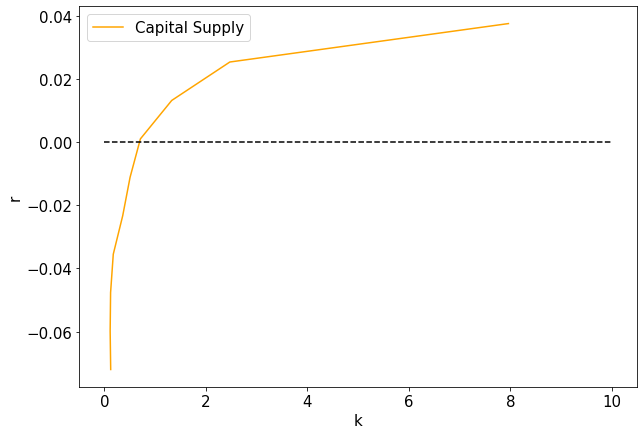

In [187]:
k_sup = interp1d(a_means,r_grid)

plt.figure(figsize = (10,7))
plt.plot(a_means,k_sup(a_means),color='orange',label = 'Capital Supply')
plt.ylabel('r', fontsize = 15)
plt.xlabel('k', fontsize = 15)
plt.legend(fontsize = 15)
plt.hlines(y=0,xmin = 0, xmax = 10,colors='black',linestyles='dashed')
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

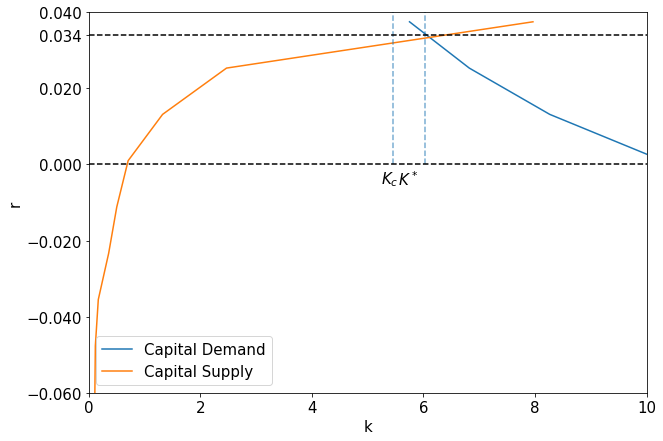

In [190]:
k = lambda r : ((r+δ)/α)**(1/(α-1))
k_grid = k(r_grid)
k_d = interp1d(k(r_grid),r_grid)
k_sup = interp1d(a_means,r_grid)
λ= (1-β)/β

plt.figure(figsize = (10, 7))
plt.plot(k_grid,k_d(k_grid),label = 'Capital Demand')
plt.plot(a_means, k_sup(a_means), label = 'Capital Supply')
plt.ylabel('r',fontsize = 15)
plt.xlabel('k',fontsize = 15)
plt.xlim([0,10])
plt.ylim([-0.06,0.04])
plt.vlines(x=k(λ),ymin=0,ymax=0.04,linestyles='dashed',alpha = 0.6)
plt.vlines(x=k(0.034),ymin=0,ymax=0.04,linestyles='dashed',alpha = 0.6)
plt.text(x=k(λ)-0.2,y=-0.005,s=r'$K_c$',fontsize = 15)
plt.text(x=k(0.0375)-0.2,y=-0.0055,s=r'$K^*$',fontsize = 15)
plt.hlines(y=0.034,xmin = 0, xmax = 10,colors='black',linestyles='dashed')
plt.hlines(y=0,xmin = 0, xmax = 10,colors='black',linestyles='dashed')
plt.yticks([0.04,0.034,0.02,0.00,-0.02,-0.04,-0.06])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
k(0.034), k(λ)

In [192]:
K_demand - a_means

array([382.82879885,  90.1964588 ,  43.06985409,  26.04748749,
        17.61411841,  12.75840676,   9.57628312,   6.93887971,
         4.35088031,  -2.21221144])